<a href="https://colab.research.google.com/github/fkofkf431/Netflix-Movies-and-TV-Shows-Clustering-capstone-project/blob/main/Netflix_Movies_and_TV_Shows(Clustering)_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title-Netflix Movies and TV Shows Clustering**

***Name-***Mohd Firoz Chaudhri

***Contribution-***Individual

# **Problem Description-**

In this project, the goal is to analyze and cluster a dataset of Netflix movies and TV shows. The dataset contains various attributes such as title, description, release year, duration, genres, and more. The objective is to group similar content items together into clusters based on their attributes. This clustering can provide insights into the underlying patterns and relationships between different types of content available on the platform.

# **Data Description**

The dataset comprises a collection of Netflix movies and TV shows, each represented by various attributes.

**Attributes**

Show_ID: A unique identifier for each content entry.

Type: Denotes whether the entry is a movie or TV show.

Title: The title of the content.

Director: The director's name (if applicable).

Cast: List of actors or characters (if applicable).

Country: The country of origin.

Date_Added: The date the content was added to Netflix.

Release_Year: The year the content was released.

Rating: The content's rating.

Duration: The duration in terms of seasons or minutes.

Listed_In: The genre(s) the content is categorized under.

Description: A brief synopsis of the content's plot.

# **Objective**

The objective of this dataset is to explore and analyze the content attributes to uncover patterns, trends, and potential clusters within the Netflix movies and TV shows. By utilizing clustering techniques, we aim to group similar content items together based on shared attributes. This analysis can provide valuable insights for content recommendation, trend analysis, and understanding user preferences on the platform.

# **Github Link**

https://github.com/fkofkf431/Netflix-Movies-and-TV-Shows-Clustering-capstone-project.git

In [1]:
#Importing libraries that are required
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading dataset
df=pd.read_csv('/content/drive/MyDrive/Netflix dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
#check first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#check last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#check random 10 rows
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5789,s5790,TV Show,Star Trek: Voyager,NaN,"Kate Mulgrew, Robert Beltran, Roxann Dawson, J...",United States,"October 1, 2017",2000,TV-PG,7 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy","On Voyager's 75-year journey back to Earth, th..."
4029,s4030,Movie,Memory Games,"Janet Tobias, Claus Wehlisch",NaN,"Germany, United States, Sweden","June 19, 2019",2018,TV-14,86 min,Documentaries,Glimpse into the brain's vast potential for me...
2975,s2976,Movie,In the Tall Grass,Vincenzo Natali,"Patrick Wilson, Laysla De Oliveira, Avery Whit...","Canada, United States","October 4, 2019",2019,TV-MA,102 min,"Horror Movies, Thrillers","After hearing a boy's cry for help, a pregnant..."
4117,s4118,Movie,Minnaminugu the FireFly,Anil Thomas,"Surabhi Lakshmi, Krishnan Balakrishnan, Rebecc...",India,"August 1, 2018",2017,TV-14,128 min,"Dramas, International Movies",A nameless widow juggles multiple jobs to supp...
6629,s6630,TV Show,The Magic School Bus,NaN,"Lily Tomlin, Daniel DeSanto, Erica Luttrell, M...","Canada, United States","November 19, 2014",1997,TV-Y,4 Seasons,Kids' TV,Join Ms. Frizzle as the Magic School Bus trave...
5485,s5486,TV Show,Selection Day,NaN,"Mohammad Samad, Yash Shashank Dholye, Rajesh T...",India,"December 28, 2018",2018,TV-14,1 Season,"International TV Shows, TV Dramas, Teen TV Shows",Two teen cricket prodigies struggle against th...
4220,s4221,TV Show,Monzón: A Knockout Blow,NaN,"Jorge Román, Mauricio Paniagua, Carla Quevedo,...",Argentina,"October 25, 2019",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",This dramatization tells the story of Argentin...
100,s101,Movie,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,"August 1, 2019",2009,PG-13,164 min,"Comedies, Dramas, International Movies",While attending one of India's premier college...
6707,s6708,TV Show,The Next Step,NaN,"Shamier Anderson, Victoria Baldesarra, Alexand...",Canada,"August 1, 2020",2018,TV-G,1 Season,"Kids' TV, Reality TV, TV Dramas",This drama series follows young dancers at the...
3279,s3280,TV Show,Kabaneri of the Iron Fortress: The Battle of U...,NaN,"Tasuku Hatanaka, Sayaka Senbongi, Maaya Uchida...",Japan,"September 13, 2019",2019,TV-MA,1 Season,"Anime Series, International TV Shows, TV Horror",Ikoma and the Iron Fortress take their fight t...


In [7]:
#lets check shape of the dataset
df.shape

(7787, 12)

So we have 7787 rows and 12 columns in our dataset.

In [8]:
#check information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
#check columns in our dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Data Preprocessing**

Data preprocessing is the initial step in the data analysis process where raw data is prepared and transformed into a clean, organized, and usable format.  Data preprocessing involves cleaning, organizing, and getting the data ready for analysis or modeling. It helps ensure that the data is accurate, relevant, and in a form that can provide meaningful insights or predictions.

In [10]:
#check duplicate values
df.duplicated().sum()

0

So we found no duplicate value in our dataset

In [11]:
#Check null values in our dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

So in our dataset we found that director column has 2389 null values,cast column has 718 null values, country column has 507 null values,date_added column has 10 null values and rating has null values.

**Handling null values**

In our dataset director column has more null values,so we will drop this column.And date added and ratings is not necessary column for us,so we will also drop these columns.Cast and country is important column to us,so we will fill missing values in these columns.

In [12]:
#Drop director,date_added and rating columns from our dataset
df.drop(['director','cast'],axis=1,inplace=True)

In [13]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
#fill missing values in cast and country columns
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [15]:
#date_added and rating contains an insignificant portion of the data so we will drop them from dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [16]:
#Again check null values
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now we found that we have no null values in our dataset.

# **EDA(Exploratory Data Analysis)**

EDA is about exploring and getting to know your data. You look at your data, create visualizations, calculate simple statistics, and try to understand the patterns, trends, and interesting things about it. EDA helps you become familiar with your data's story before you dive into more detailed analysis or modeling.

***Count of movies and tv shows***

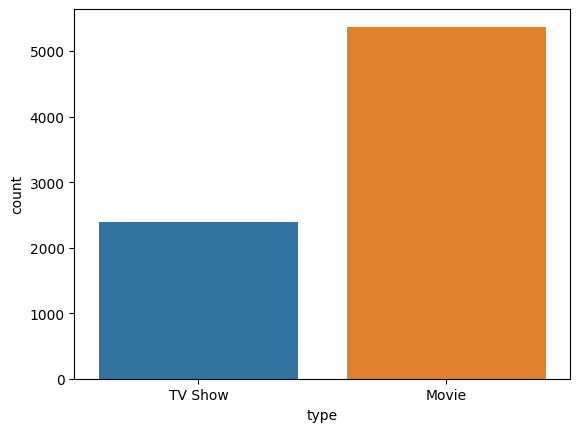

In [17]:
#Visualize the number of movies and tv shows
#convert data type in to string if it is not
df['type']=df['type'].astype(str)
#handling missing value
df['type'].fillna('Unknown',inplace=True)
#map incorrect values to the correct values
df['type'].replace({'TV Show':'TV Show'},inplace=True)
#Now visualize
sns.countplot(data=df,x='type')
plt.show()

From above plot we can see that movies are more popular than tv shows.

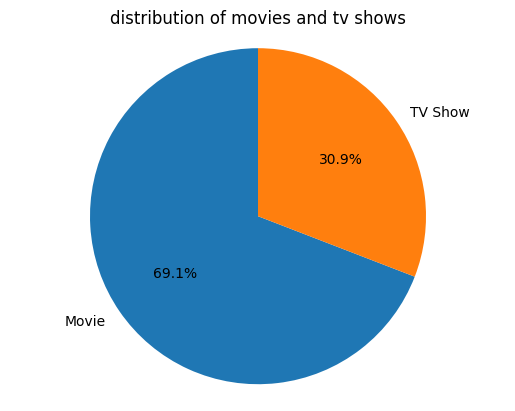

In [18]:
#Making a pie chart to know the percentage of tv show and movies
type_counts=df['type'].value_counts()
labels=type_counts.index
sizes=type_counts.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('distribution of movies and tv shows')
plt.axis('equal')
plt.show()

From above pie chart we found that around 30% tv shows and around 69% movies are popular on netflix.

In [19]:
#Now create two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

***Which category has highest ratings***

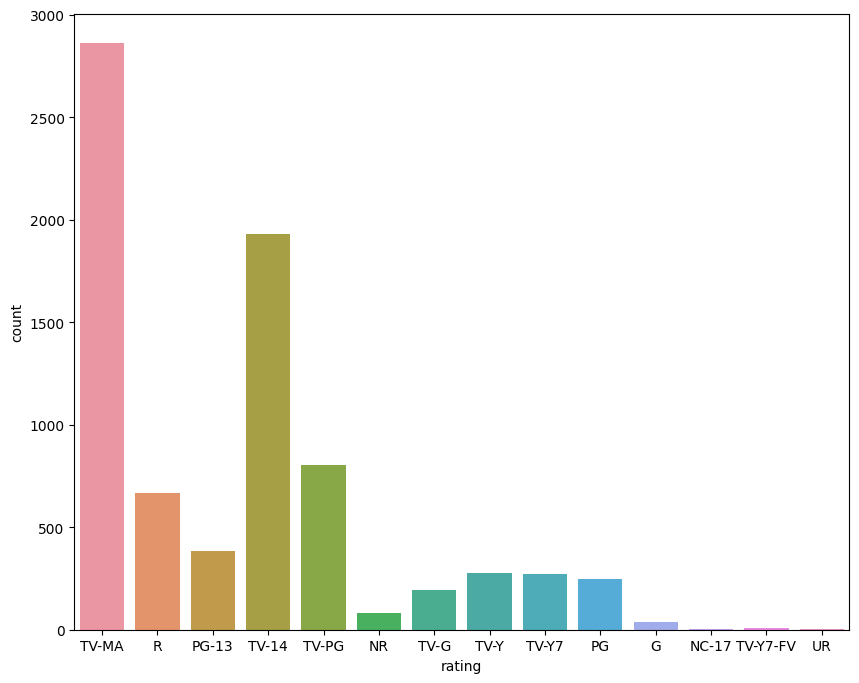

In [20]:
#lets us check which category has the highest ratings
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='rating')
plt.show()

From above barplot we found that TV_MA is the highest ratings and G is the lowest ratings.

***In which year the maximum numbers of movies released***

In [21]:
df['release_year'].value_counts().sort_index(ascending=False)

2021      31
2020     868
2019     996
2018    1120
2017    1010
        ... 
1945       3
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 73, dtype: int64

In [22]:
movies_year=movies['release_year'].value_counts().sort_index(ascending=False)


In [23]:
tvshows_year=tv_shows['release_year'].value_counts().sort_index(ascending=False)

Text(0.5, 1.02, 'production growth based on years')

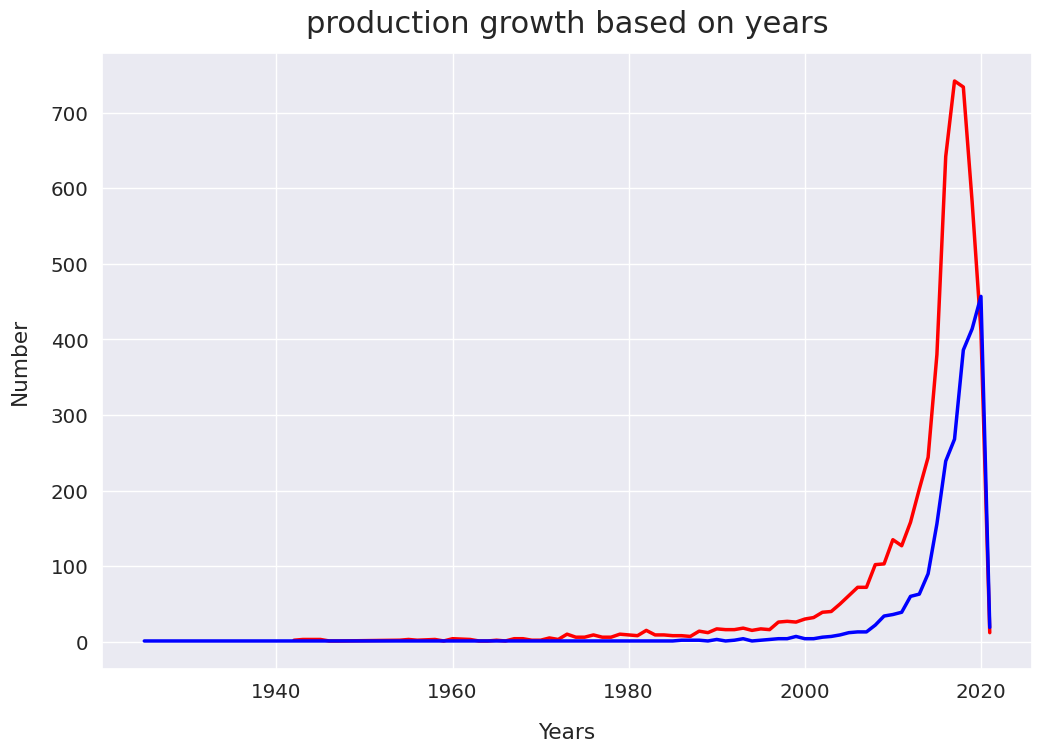

In [24]:
#Visualization the movies and tv shows based on their released year
sns.set(font_scale=1.3)
movies_year.plot(figsize=(12,8),linewidth=2.5,color='red',label='Movies/year',ms=3)
tvshows_year.plot(figsize=(12,8),linewidth=2.5,color='blue',label='TV Shows/year')
plt.xlabel('Years',labelpad=15)
plt.ylabel('Number',labelpad=15)
plt.title('production growth based on years',y=1.02,fontsize=22)

Red color shows the growth year of movies and blue color shows the growth year of tv shows.As we can see from the graph that as increasing of years also increasing the graph of movies and tv shows.But the popularity of tv shows is less as compare to movies on netflix.

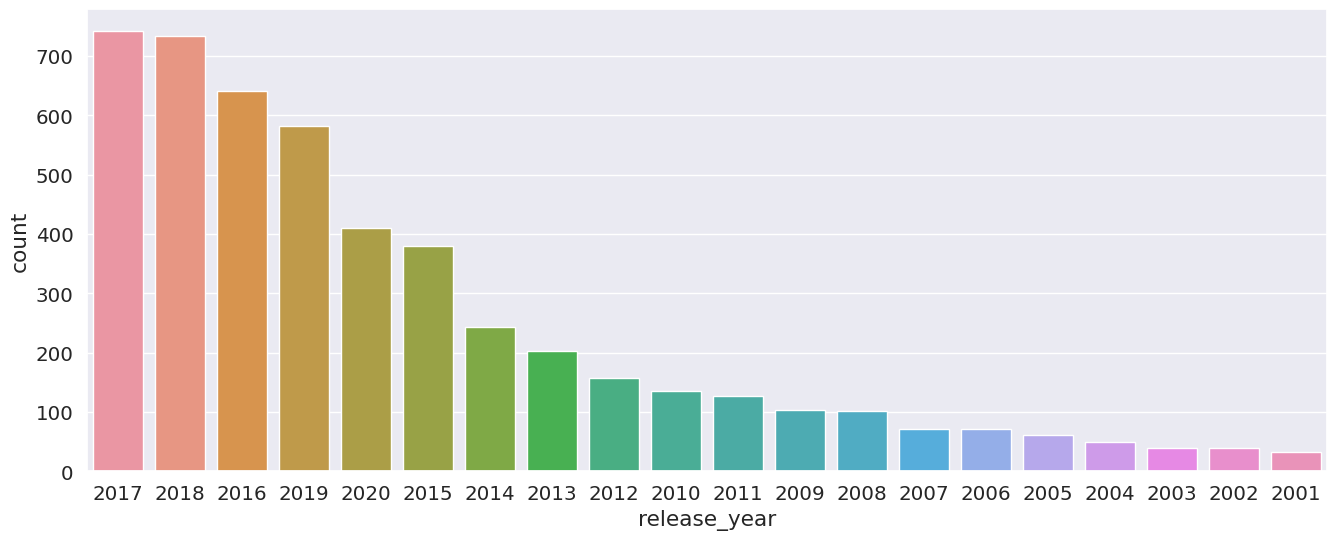

In [25]:
#Analysing how many movies are released every year in last 20 years
plt.figure(figsize=(16,6))
sns.countplot(x=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])
plt.show()

From above graph we can see that as year increasing the releasing of movies per year is also increasing.So we can say that maximum number of movies released in year 2017.

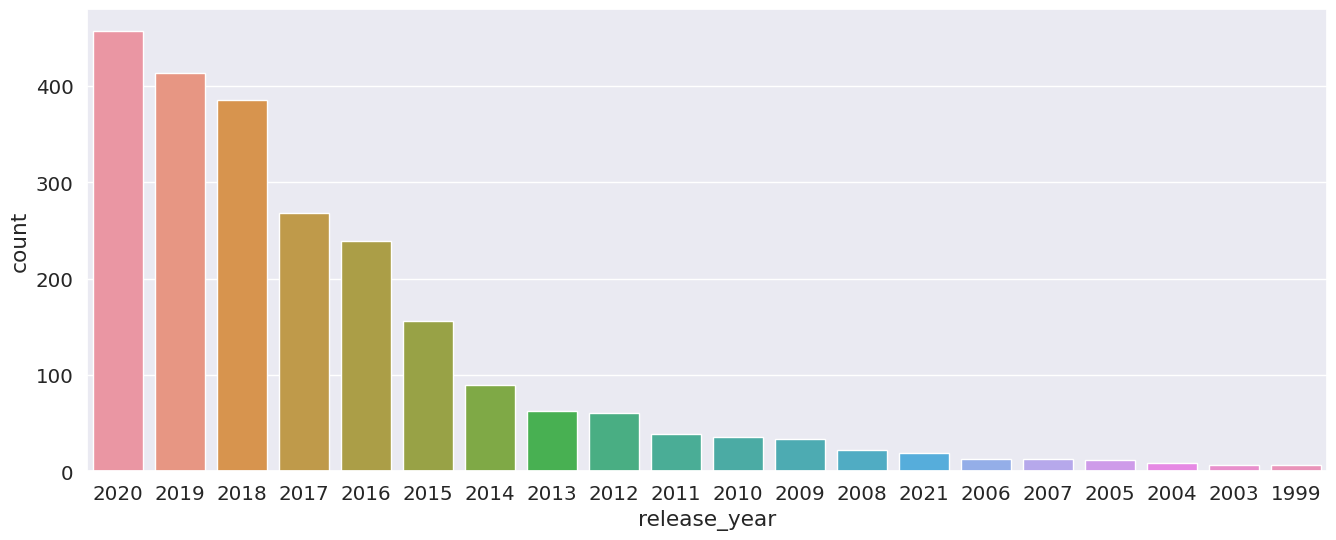

In [26]:
#Let see how many tv shows are released in past 20 years
plt.figure(figsize=(16,6))
sns.countplot(x=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])
plt.show()

From this as we can that as like movies growth of tv shows is also increasing of increasing years.So we can see that maximum number of tv show released in year 2020.

***Which genre is more popular***

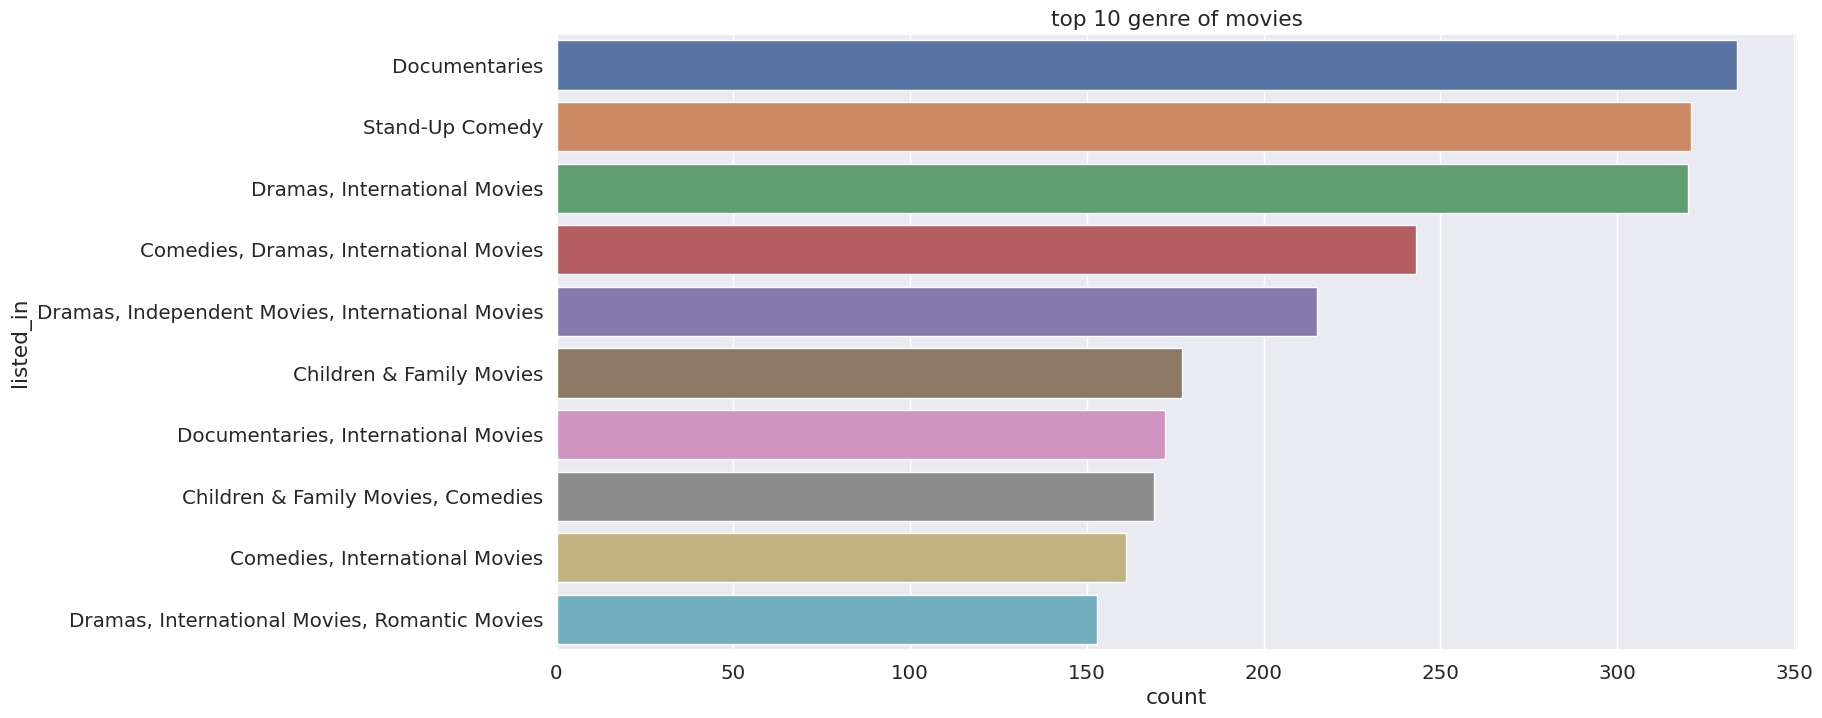

In [27]:
#Analysing top 10 genre of the movies
plt.figure(figsize=(16,8))
plt.title('top 10 genre of movies')
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])
plt.show()

From graph we can see that documentry is more popular than the other categories.

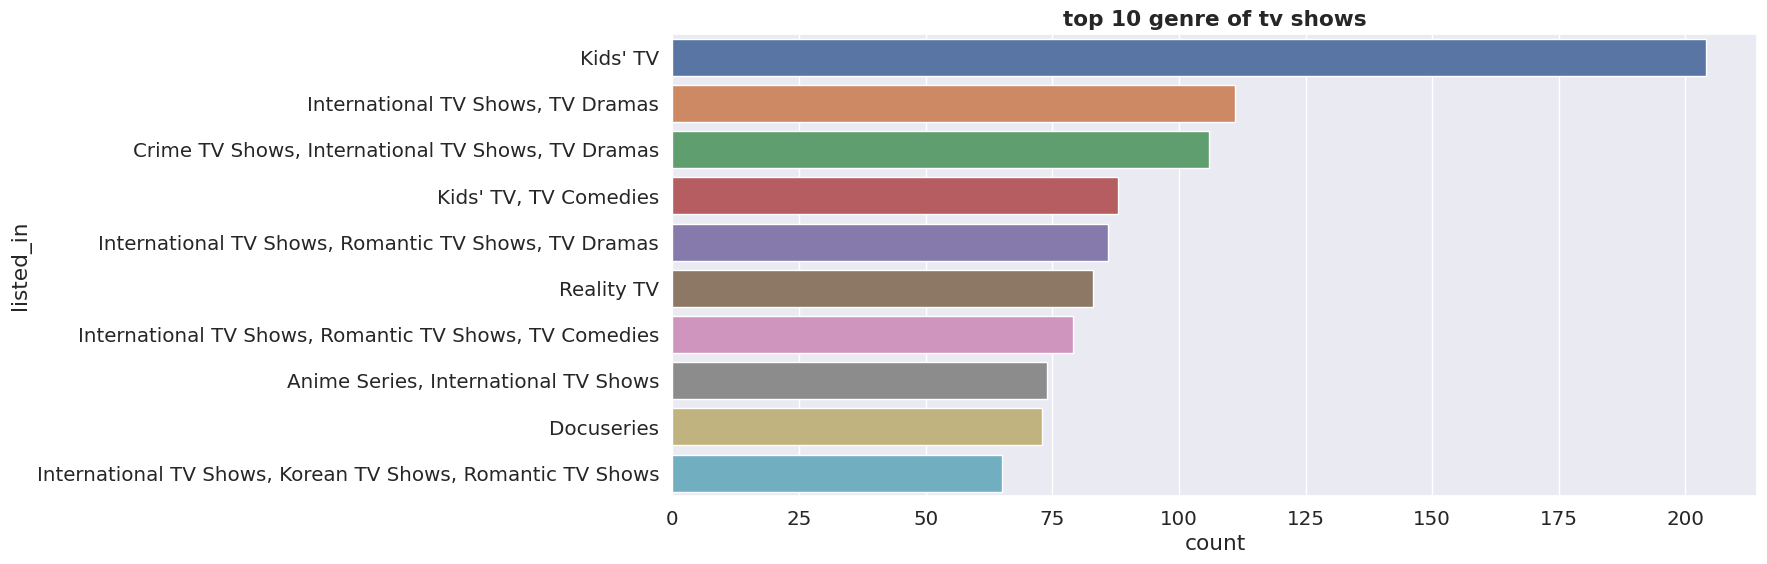

In [28]:
#Analysing top 10 genre of movies
plt.figure(figsize=(14,6))
plt.title('top 10 genre of tv shows',fontweight='bold')
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])
plt.show()

From this graph we can see that kids TV is more popular in tv shows,accordingly other tv shows.

***Lets check which season has the maximum duration***

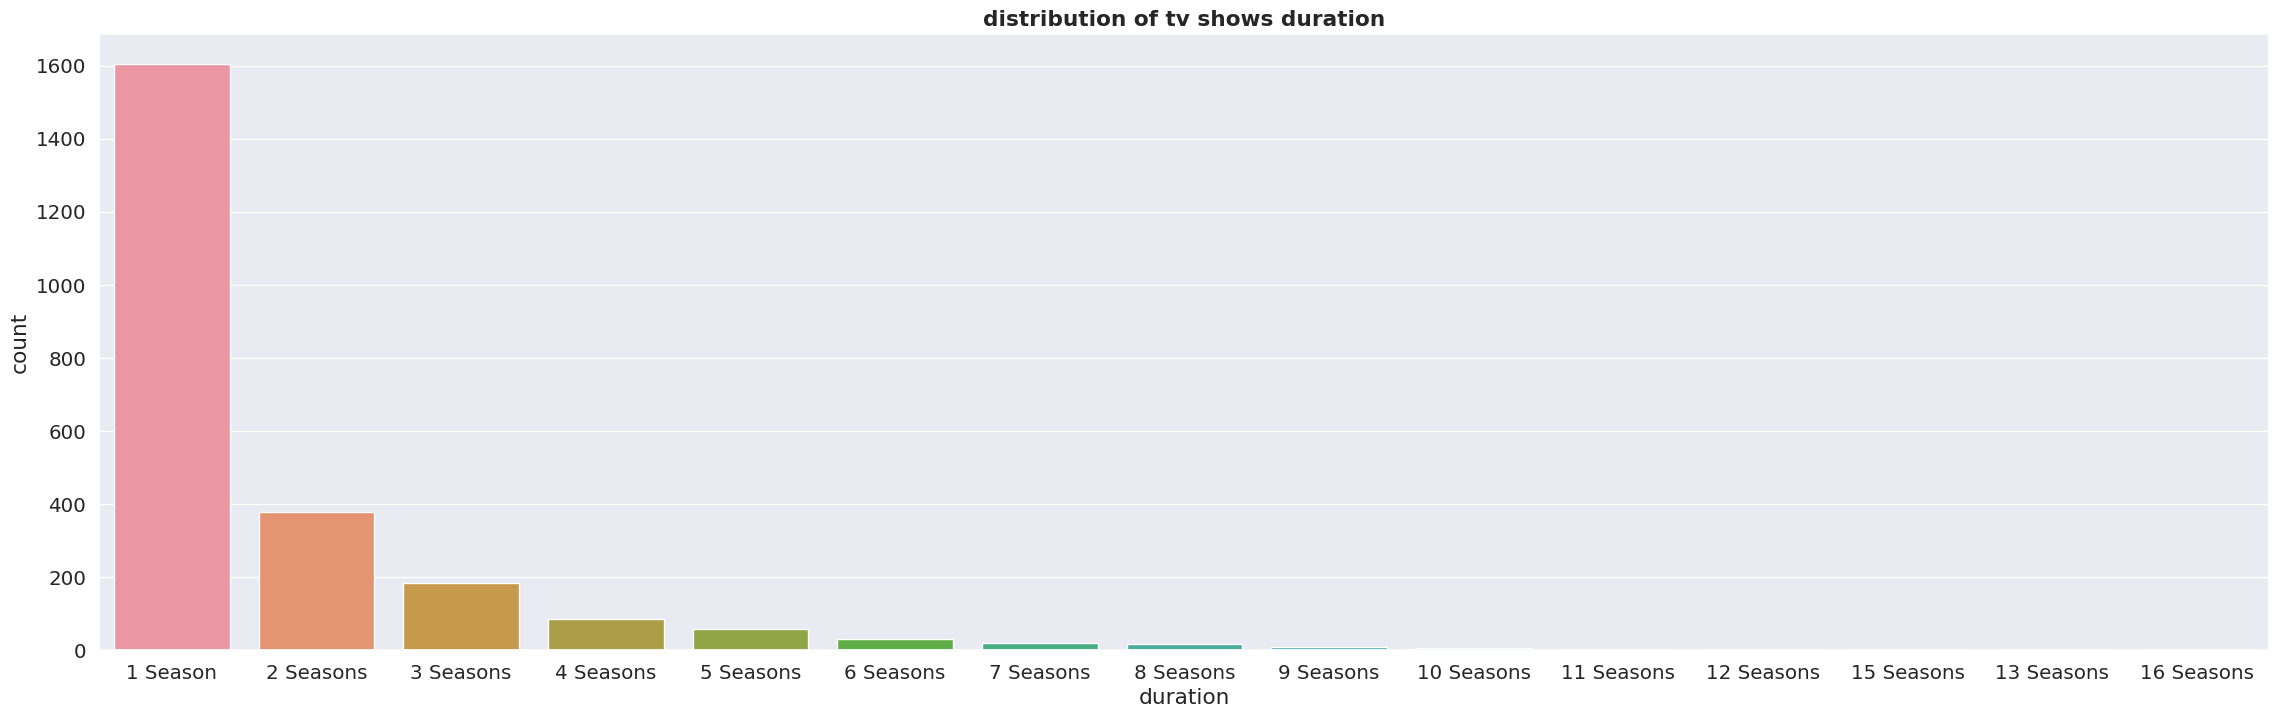

In [29]:
#lets check distribution of tv shows
plt.figure(figsize=(28,8))
plt.title('distribution of tv shows duration',fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order=tv_shows['duration'].value_counts().index)
plt.show()

So from above graph we see that season 1 is more duration than the other season.

***Which country has the maximum number of content on netflix***

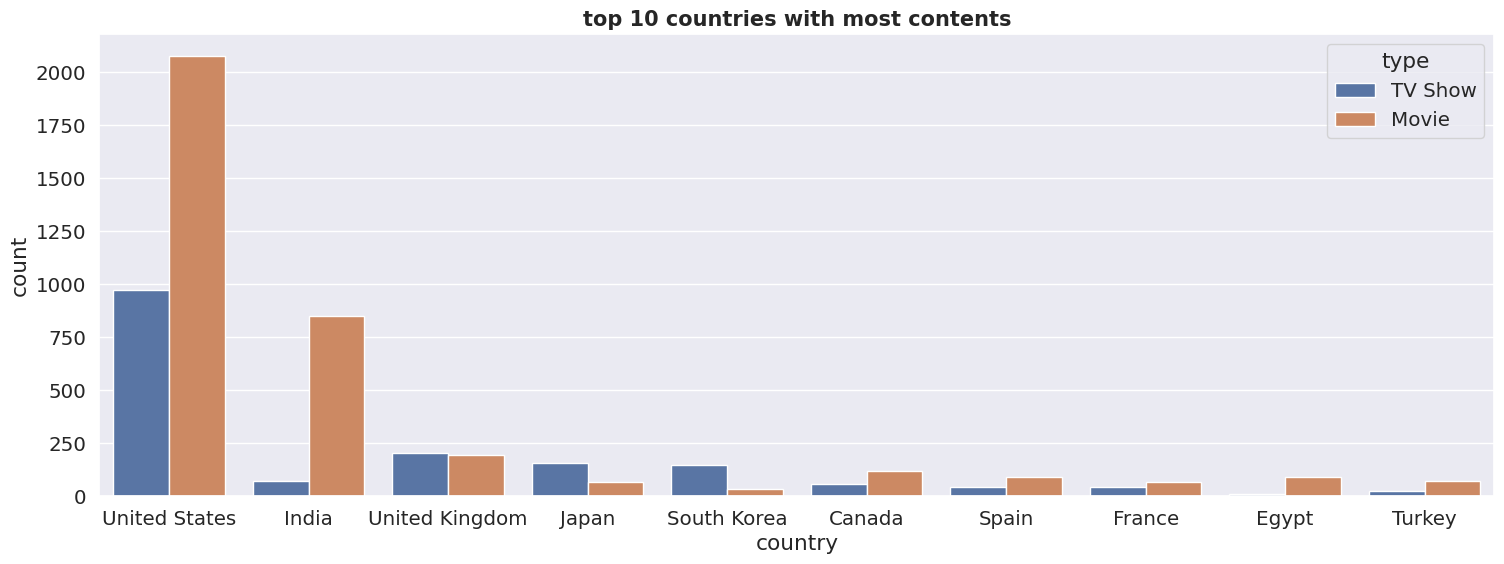

In [30]:
#Checking top 10 countries with most content
plt.figure(figsize=(18,6))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:10],hue=df['type'])
plt.title('top 10 countries with most contents',fontsize=15,fontweight='bold')
plt.show()

From above barplot we can see that America has maximum number of content avaliable on netflix,than India and than UK.

# ***Feature Engineering***

feature engineering involves selecting and crafting the most relevant attributes from your data to create a better input for a machine learning algorithm. It's about transforming and creating new features from the raw data to help algorithms understand patterns and make accurate predictions. Just as a well-prepared ingredient enhances the taste of a dish, well-engineered features enhance the performance of machine learning models.

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
df.dtypes

show_id                 object
type                    object
title                   object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [35]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [36]:
#Making list of description features
df['description']=df['description'].apply(lambda x: x.split(' '))

In [38]:
#converting text feature to string from list
df['description']=df['description'].apply(lambda x: " ".join(x))
#making all words in text feature to lowercase
df['description']=df['description'].apply(lambda x: x.lower())

In [41]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
 #replacing the punctuation with no space
    translator = str.maketrans('','', string.punctuation)
    return text.translate(translator)
 #applying above function on text feature


In [42]:
df['description']=df['description'].apply(remove_punctuation)

In [43]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [44]:
#To download stopwords using nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#Defining stopwords
def stopwords(text):
  '''a function for removing the stopword'''
  text=[word for word in text.split() if word not in sw]
  #joining the list of words with space
  return " ".join(text)

In [46]:
#Apllying above function on  text feature
df['description']=df['description'].apply(stopwords)
df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

Now converting text in to vector

In [48]:
#Importing Tfidf vectorizer to cinvert text in to vvector
from sklearn.feature_extraction.text import TfidfVectorizer

#applying Tfidf vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf=tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [49]:
#convert X in to array to form clustering
X=X_tfidf.toarray()

# **Model Selection**

**K-Mean**

K-Means does groups similar data points into clusters based on their features. It helps find patterns in data by making sure similar things are grouped together.

***Finding the optimal number of clusters using elbow method***

In [50]:
from sklearn.cluster import KMeans
wcss_list=[] #initializing the list for the values of wcss("Within-Cluster Sum of Squares.")

#Using for loop for iterations from 1 to 30
for i in range(1,30):
  kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)



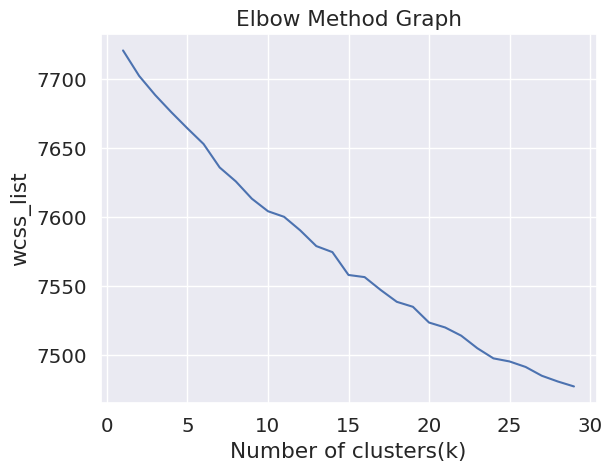

In [51]:
#plotting elbow method graph
plt.plot(range(1,30),wcss_list)
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [52]:
#silhoutte score of clusters
from sklearn.metrics import silhouette_score
sill=[]
for i in range(2,30):
  model= KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  y1= model.predict(X)
  score=silhouette_score(X,y1)
  sill.append(score)
  print('cluster: %d \t sillhoute: %0.4f'%(i,score))

cluster: 2 	 sillhoute: 0.0014
cluster: 3 	 sillhoute: 0.0018
cluster: 4 	 sillhoute: 0.0020
cluster: 5 	 sillhoute: 0.0024
cluster: 6 	 sillhoute: 0.0029
cluster: 7 	 sillhoute: 0.0035
cluster: 8 	 sillhoute: 0.0038
cluster: 9 	 sillhoute: 0.0044
cluster: 10 	 sillhoute: 0.0046
cluster: 11 	 sillhoute: 0.0050
cluster: 12 	 sillhoute: 0.0049
cluster: 13 	 sillhoute: 0.0053
cluster: 14 	 sillhoute: 0.0055
cluster: 15 	 sillhoute: 0.0059
cluster: 16 	 sillhoute: 0.0060
cluster: 17 	 sillhoute: 0.0060
cluster: 18 	 sillhoute: 0.0064
cluster: 19 	 sillhoute: 0.0063
cluster: 20 	 sillhoute: 0.0067
cluster: 21 	 sillhoute: 0.0066
cluster: 22 	 sillhoute: 0.0069
cluster: 23 	 sillhoute: 0.0071
cluster: 24 	 sillhoute: 0.0069
cluster: 25 	 sillhoute: 0.0069
cluster: 26 	 sillhoute: 0.0072
cluster: 27 	 sillhoute: 0.0076
cluster: 28 	 sillhoute: 0.0072
cluster: 29 	 sillhoute: 0.0073


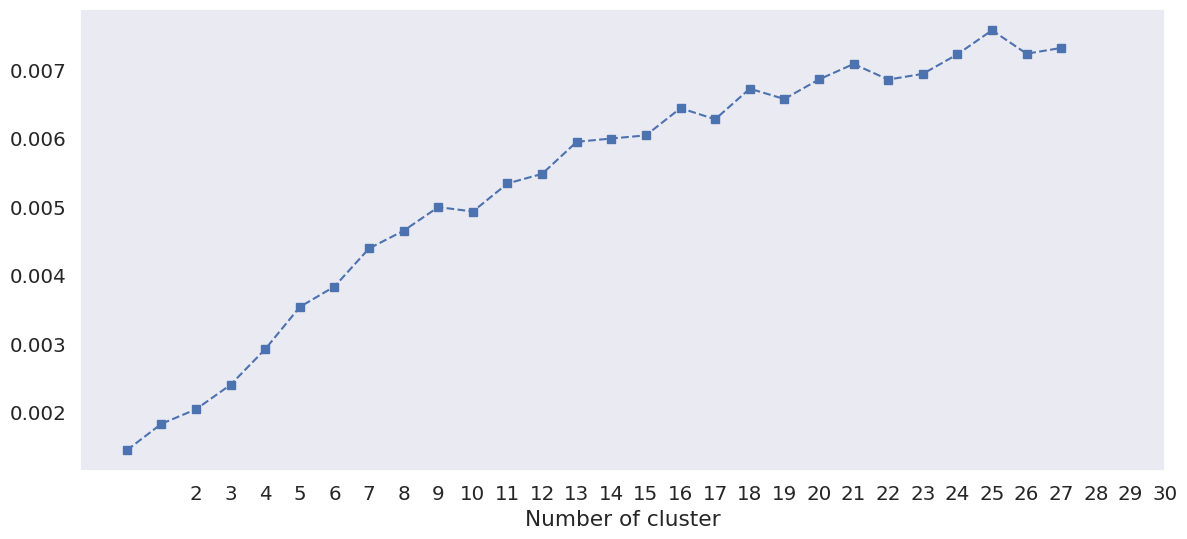

In [53]:
#Plotting sillhoute score
plt.figure(figsize=(14,6))
plt.plot(sill,'bs--')
plt.xticks(list(range(2,31)),list(range(2,31)))
plt.grid()
plt.xlabel('Number of cluster')
plt.show()

Based on the elbow method and silhoutte score we found that 26 clusters will be formed for the given dataset.

**Training the model**

In [54]:
#training the k-means model
kmeans=KMeans(n_clusters=26,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(X)

# **Model Evaluation**

In [55]:
#predict the clusters and evaluate the sillhoute score
score=silhouette_score(X,y_predict)
print('silhouette score is {}'.format(score))

silhouette score is 0.007218341785521539


In [56]:
#davies bouldin score for clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_predict)

9.193799997853855

In [57]:
#adding a seperate column for clusters
df["cluster"]=y_predict

In [58]:
df['cluster'].value_counts().sort_index()

0      155
1      271
2      532
3     2504
4      158
5      319
6       72
7      268
8      205
9      138
10     224
11     331
12     232
13      79
14     284
15     189
16     209
17     223
18     289
19     192
20     108
21     175
22     140
23     234
24     150
25      89
Name: cluster, dtype: int64

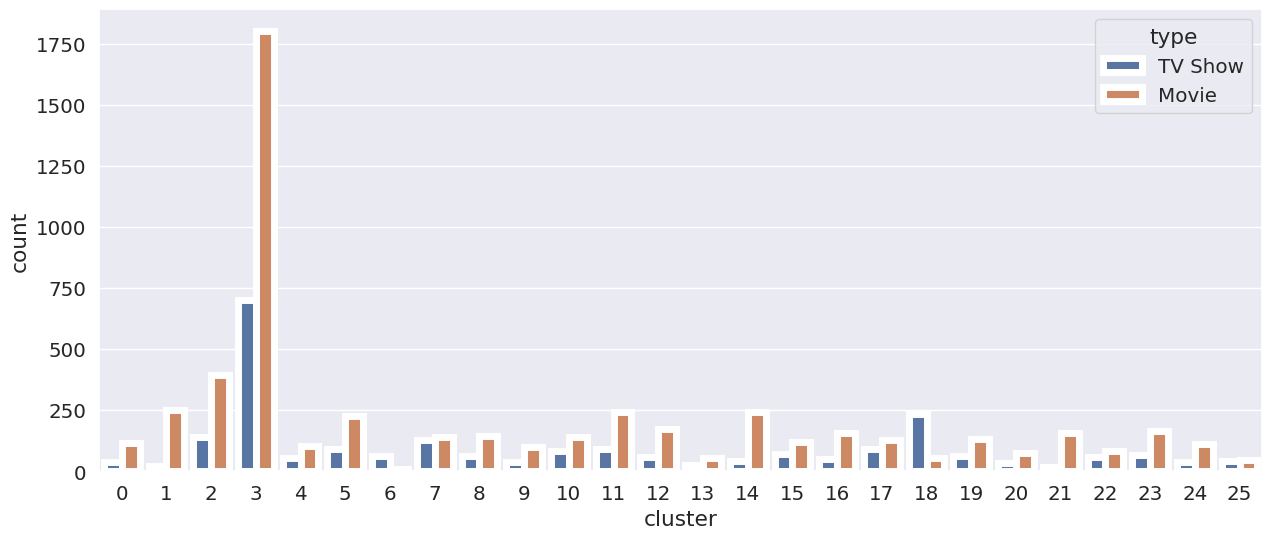

In [59]:
#plotting graph
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(x='cluster',hue='type',lw=5,data=df,ax=ax)
plt.show()

from above barplot we can see that third cluster contains the higher number of data points as compared to other clusters.

In [60]:
#scatter plot for clusters
fig=px.scatter(df,y='description',x='cluster',color='cluster')
fig.update_traces(marker_size=100)
fig.show()

# **Agglomerative clustering algorithm**

Agglomerative clustering is like building a family tree in reverse. You start with individual people and gradually group them together based on their similarities. It's a bottom-up approach where you combine the closest individuals or groups step by step until everyone is in one big family. In data, Agglomerative clustering groups data points based on their distances, creating clusters that are more similar to each other as you move up the hierarchy. It's a bit like putting similar puzzle pieces together to form bigger pieces until you have a complete picture.

In [61]:
#Agglomerative clusters
from sklearn.cluster import AgglomerativeClustering

aggh=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
aggh.fit(X)
y_hc=aggh.fit_predict(X)

In [62]:
df_hierarchical=df.copy()
#creating a column where each row is assigned to their seperate cluster
df_hierarchical['cluster']=aggh.labels_
df_hierarchical.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,1
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,1
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,0
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,1
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,0


# **Model evaluation**

In [63]:
#Sillihouette coefficient
print('sillihouette coefficient: %0.3f'%silhouette_score(X,y_hc,metric='euclidean'))

sillihouette coefficient: -0.002


In [64]:
#davies bouldin score
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_hc)

13.979382092977453

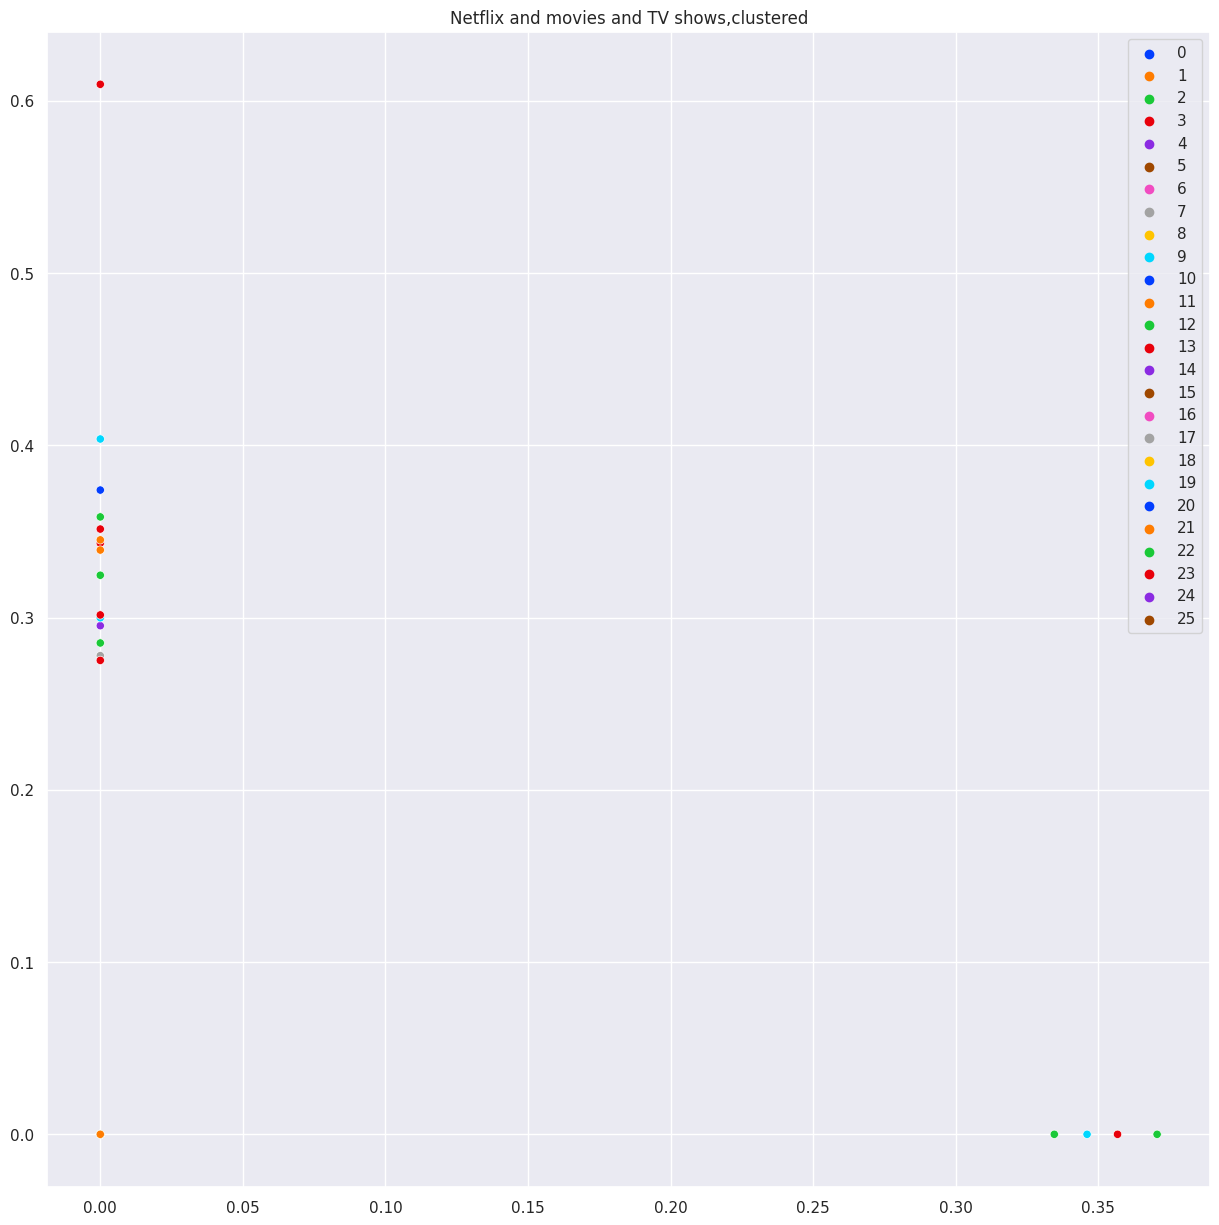

In [65]:
#Scatterplot for cluster
sns.set(rc={'figure.figsize':(15,15)})
palette=sns.color_palette('bright',len(set(y_predict)))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_predict,palette=palette)
plt.title('Netflix and movies and TV shows,clustered')
plt.show()

# **Conclusion**

Through the application of clustering techniques on the Netflix movies and TV shows dataset, we have gained valuable insights into the content landscape of the platform. By grouping similar content items based on shared attributes, we were able to uncover underlying patterns and trends that offer meaningful implications.

After using two algorithms that is k-means and agglomerative clustering algorithm we found that the evaluation of Elbow and Silhouette scores,the optimal number of clusters is determined to be 26.K Means found to be more suitable for identification than the agglomerative clustering.

TV-MA shows the highest number of ratings among tv shows.It represent the adult content.

Documentries emerge as the most popular genre on netflix,than stand up comedy than dramas.

Kids tv shows is the top genre among all the tv shows on netflix.